In [57]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import copy

In [58]:
#load the data
df = pd.read_csv('Breast_cancer_data.csv')
# a few top lines 
df.head(5)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [60]:
#using library and slplint data
fet = ["mean_radius", "mean_texture", "mean_perimeter", "mean_area","mean_smoothness"]
target = "diagnosis"
fet_train, fet_test, target_train, target_test = train_test_split(df[fet],df[target],test_size = 0.2)

In [61]:
class GaussianNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.means = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        # calculating the mean, variance and prior P(H) for each class
        for i, c in enumerate(self.classes):
            X_for_class_c = X[y==c]
            self.means[i, :] = X_for_class_c.mean(axis=0)
            self.var[i, :] = X_for_class_c.var(axis=0)
            self._priors[i] = X_for_class_c.shape[0] / float(n_samples)

    # calculating the likelihood, P(E|H)
    def _calculate_likelihood(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.var[class_idx]
        num = np.exp(- (x-mean)**2 / (2 * var))
        denom = np.sqrt(2 * np.pi * var)
        return num / denom

    def predict(self, X):
        y_pred = [self._classify_sample(x) for x in X]
        return np.array(y_pred)

    def _classify_sample(self, x):
        posteriors = []

        # calculating posterior probability for each class
        for i, c in enumerate(self.classes):
            prior = np.log(self._priors[i])
            posterior = np.sum(np.log(self._calculate_likelihood(i, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return the class with highest posterior probability
        return self.classes[np.argmax(posteriors)]

In [62]:
#model fit
m = GaussianNB()
m.fit(fet_train, target_train)
#prediction
res = m.predict(fet_test);


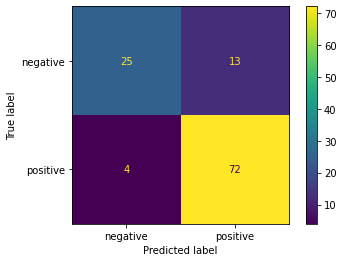

In [65]:
#confusion_matrix
cm = metrics.confusion_matrix(target_test, res)
cm_d = metrics.ConfusionMatrixDisplay(cm,display_labels=['negative', 'positive'])
cm_d.plot()
plt.show()

In [64]:
precision, recall, fscore, support = score(target_test,res)

chart = PrettyTable(['Label', 'Precision', 'Recall'])
chart.add_row(['negative', round(precision[0]*100, 2), round(recall[0]*100, 2)])
chart.add_row(['positive', round(precision[1]*100, 2), round(recall[1]*100, 2)])
print(chart)

+----------+-----------+--------+
|  Label   | Precision | Recall |
+----------+-----------+--------+
| negative |   86.21   | 65.79  |
| positive |   84.71   | 94.74  |
+----------+-----------+--------+


In [66]:
acc = accuracy_score(target_test,res)
acc

0.8508771929824561